In [388]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
%pylab inline
df = pd.read_csv('gun_cleaned3.csv')
pop = pd.read_csv('city_pop.csv')
city_charac = pd.read_csv('gun_city_charac.csv')

Populating the interactive namespace from numpy and matplotlib


In [51]:
import sys
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda2

  added / updated specs: 
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.5.9                |           py27_0         1.0 MB

The following packages will be UPDATED:

    conda: 4.5.4-py27_0 --> 4.5.9-py27_0


conda-4.5.9          |  1.0 MB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [309]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='candicezuo', api_key='OZMLjjHkMhRRsooNi981')
init_notebook_mode(connected=True)

In [351]:
len(df)

13577

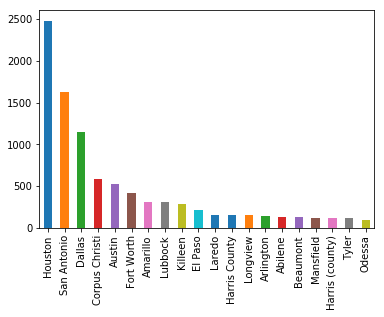

In [40]:
#cities that violence happen most often
city_freq = df['city_or_county'].value_counts()
city_freq[:20].plot(kind = 'bar')
#divided by population 

In [35]:
#number of violences with injured# and killed#
injured_freq = df['n_injured'].value_counts()
killed_freq = df['n_killed'].value_counts()
killed_injured = pd.concat([injured_freq,killed_freq], axis = 1)
#killed_injured = killed_injured/13577

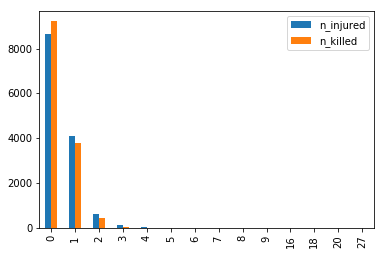

In [36]:
killed_injured.plot(kind = 'bar')

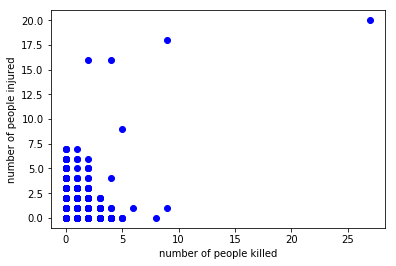

In [16]:
# corresponding injured and killed number
plot(df['n_killed'], df['n_injured'], marker='o', color='blue', linestyle='None')
xlabel('number of people killed')
ylabel('number of people injured')
#title('Weight versus Efficiency')
show()

In [90]:
df['loss'] = df['n_killed'] + df['n_injured']
df1 = df.sort_values(['loss'], ascending=[False])
df1[['date', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,city_or_county,address,n_killed,n_injured
12536,11/5/17,Sutherland Springs,216 4th St,27,20
4380,5/17/15,Waco,4671 S Jack Kultgen Fwy,9,18
771,4/2/14,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
7,11/9/13,Cypress,7300 block of Enchanted Creek Drive,2,16
8239,7/7/16,Dallas,800 Main St,5,9
12162,9/10/17,Plano,1712 West Spring Creek Parkway,9,1
5153,8/8/15,Houston,2211 Falling Oaks,8,0
3,8/7/13,Dallas,7100 block of Long Canyon Trail,4,4
435,2/16/14,Dallas,2600 block of South Harwood Street,1,7
7915,5/29/16,Houston,13210 Memorial Drive,2,6


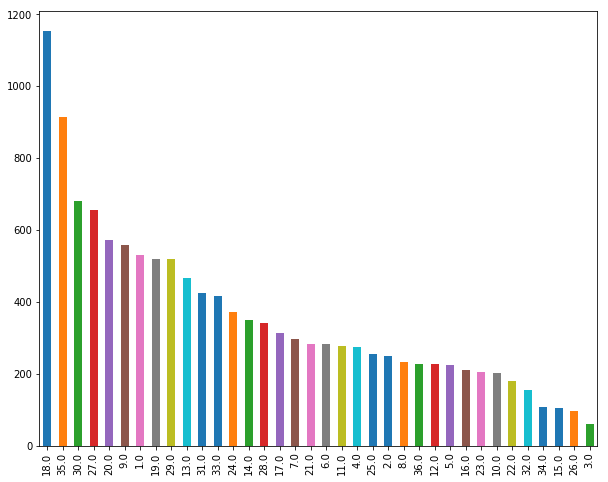

In [21]:
# congress district where violence most happen
congdis_freq = df['congressional_district'].value_counts()
congdis_freq.plot(kind = 'bar',figsize=(10,8))
#18 Jackson Lee (hoston); 35 Dogget (Austin?); 

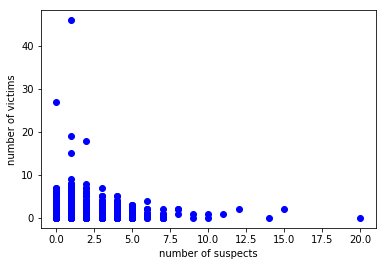

In [33]:
#corresponding number of victims and suspects
plot(df['n_suspect'],df['n_victim'],  marker='o', color='blue', linestyle='None')
xlabel('number of suspects')
ylabel('number of victims')
#title('Weight versus Efficiency')
show()
#few suspects can cause more dangerous than a lot suspects

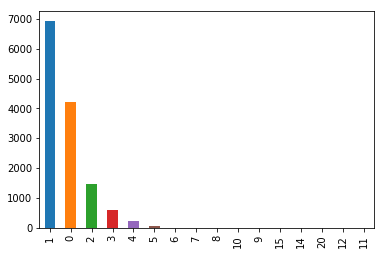

In [34]:
#number of violences with number of suspects
suspect_freq = df['n_suspect'].value_counts()
suspect_freq.plot(kind = 'bar')
#what happen in the 0 suspect situation?

In [ ]:
#victim number with gender and age
female = df[df['victim_gender'] == 4]
c6 = cars[cars['cyl'] == 6]
c8 = cars[cars['cyl'] == 8]

Text(0.5,0,'City')

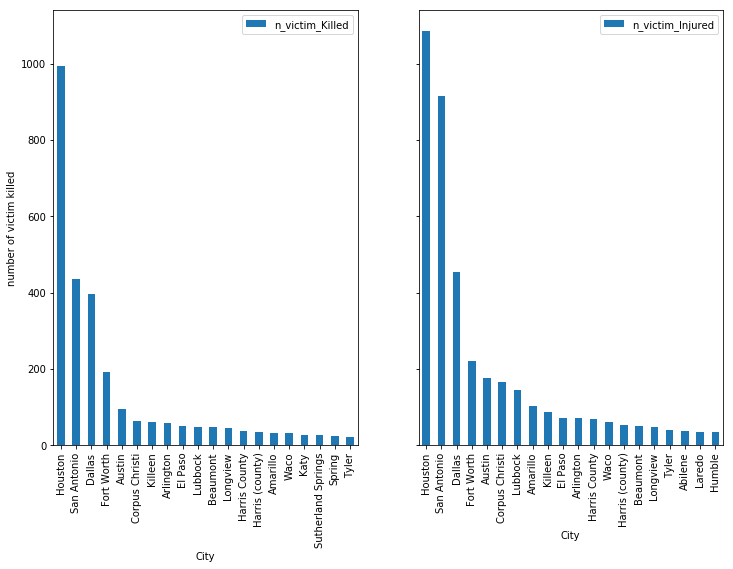

In [59]:
temp1 = df[['city_or_county', 'n_victim_Killed']].groupby(['city_or_county'], 
                                   as_index=False).sum().sort_values(by='n_victim_Killed', ascending=False).head(20)
temp2 = df[['city_or_county', 'n_victim_Injured']].groupby(['city_or_county'], 
                                   as_index=False).sum().sort_values(by='n_victim_Injured', ascending=False).head(20)
temp1 = temp1.set_index('city_or_county')
temp2 = temp2.set_index('city_or_county')
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(12, 8))
temp1.plot(ax=ax1, kind = 'bar')
ax1.set_xlabel('City')
ax1.set_ylabel('number of victim killed')
temp2.plot(ax=ax2, kind = 'bar')
ax2.set_xlabel('City')

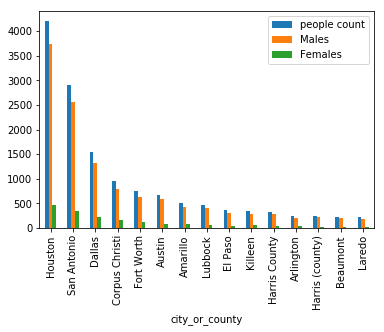

In [70]:
# split participants into male&female and list in order of total people
def extract(a):
    a = a.split('||')
    a  = [x.replace('::','-') for x in a]
    a =  [(x.split('-')) for x in a]
    y = []
    for  i in range (0, len(a)):
        y.append(a[i][-1])
    return(y)  
df['participant_gender'] = df['participant_gender'].fillna("0::Zero")
df['gender'] = df['participant_gender'].apply(lambda x: extract(x))
df['Males'] = df['gender'].apply(lambda x: x.count('Male'))
df['Females'] = df['gender'].apply(lambda x: x.count('Female'))
df['people count'] = df['Males'] + df['Females']
df[['city_or_county','people count', 'Males', 'Females']].groupby('city_or_county').sum().sort_values(by = ['people count'],ascending = False)[:15].plot(kind='bar')

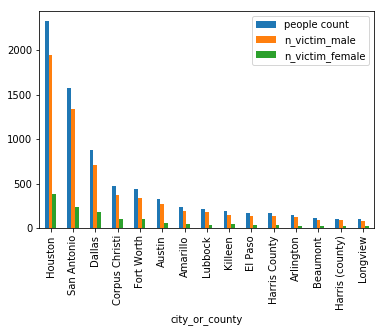

In [76]:
#same on victim
df['people count'] = df['n_victim_male'] + df['n_victim_female']
df[['city_or_county','people count', 'n_victim_male', 'n_victim_female']].groupby('city_or_county').sum().sort_values(by = ['people count'],ascending = False)[:15].plot(kind='bar')

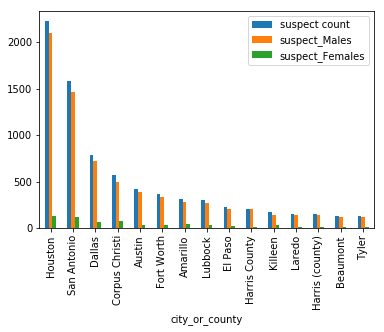

In [81]:
# same on suspect
df['suspect_gender'] = df['suspect_gender'].fillna("0::Zero")
#df['suspect_gender'] = df['suspect_gender'].apply(lambda x: extract(x))
df['suspect_Males'] = df['suspect_gender'].apply(lambda x: x.count('Male'))
df['suspect_Females'] = df['suspect_gender'].apply(lambda x: x.count('Female'))
df['suspect count'] = df['suspect_Males'] + df['suspect_Females']
df[['city_or_county','suspect count', 'suspect_Males', 'suspect_Females']].groupby('city_or_county').sum().sort_values(by = ['suspect count'],ascending = False)[:15].plot(kind='bar')

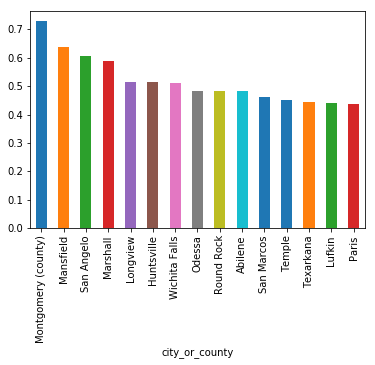

In [212]:
suspect_arrest = df[['city_or_county','n_suspect', 'n_suspect_Arrested']].groupby('city_or_county').sum().sort_values(by = ['n_suspect'],ascending = False)[:50]#.plot(kind='bar')
suspect_arrest['percent'] = suspect_arrest['n_suspect_Arrested']/suspect_arrest['n_suspect']
suspect_arrest['percent'].sort_values(ascending = False)[:15].plot(kind='bar')

In [284]:
suspect_arrest.sort_values(by = ['percent'],ascending = False)[:20]

,n_suspect,n_suspect_Arrested,percent
city_or_county,,,
Montgomery (county),37,27,0.729730
Mansfield,58,37,0.637931
San Angelo,107,65,0.607477
Marshall,51,30,0.588235
Longview,130,67,0.515385
Huntsville,33,17,0.515152
Wichita Falls,80,41,0.512500
Odessa,128,62,0.484375
Round Rock,54,26,0.481481


In [129]:
df_age=df.dropna(subset=['participant_age'])
df_age['ages'] = df_age['participant_age'].apply(lambda x: extract(x))
df_age=df_age[['ages','participant_age']]
df_age = pd.DataFrame(df_age.ages.values.tolist(), index= df_age.index)
#df_age#.head()

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



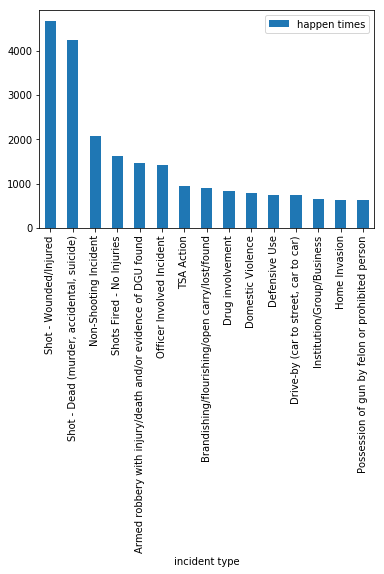

In [105]:
#what is the most often accident type?
from collections import Counter
big_text = "||".join(df['incident_characteristics'].dropna()).split("||")
incidents = Counter(big_text).most_common(20)
xx = [x[0] for x in incidents]
yy = [x[1] for x in incidents]
incident_type = pd.DataFrame({'happen times': yy, 'incident type': xx})
incident_type.set_index('incident type')[:15].plot(kind = "bar")

In [170]:
xx

['Shot - Wounded/Injured',
 'Shot - Dead (murder, accidental, suicide)',
 'Non-Shooting Incident',
 'Shots Fired - No Injuries',
 'Armed robbery with injury/death and/or evidence of DGU found',
 'Officer Involved Incident',
 'TSA Action',
 'Brandishing/flourishing/open carry/lost/found',
 'Drug involvement',
 'Domestic Violence',
 'Defensive Use',
 'Drive-by (car to street, car to car)',
 'Institution/Group/Business',
 'Home Invasion',
 'Possession of gun by felon or prohibited person',
 'Accidental Shooting',
 'Possession (gun(s) found during commission of other crimes)',
 'Suicide^',
 'Gun(s) stolen from owner',
 'ATF/LE Confiscation/Raid/Arrest']

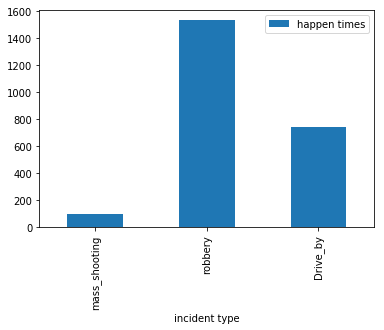

In [125]:
#incident_type[incident_type['incident type'] == 'Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)']
mass_shooting = df['mass_shooting'].sum()
robbery = df['robbery'].sum()
Drive_by = df['Drive-by'].sum()
three_incident_number = [mass_shooting,robbery,Drive_by]
three_incident_type = ['mass_shooting','robbery', 'Drive_by']
three_incident = pd.DataFrame({'happen times': three_incident_number, 'incident type': three_incident_type})
three_incident.set_index('incident type').plot(kind = "bar")

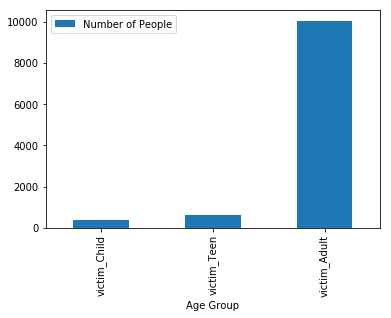

In [113]:
victim_Child = df['n_victim_Child'].sum()
victim_Teen = df['n_victim_Teen'].sum()
victim_Adult = df['n_victim_Adult'].sum()
three_agegroup_count = [victim_Child,victim_Teen,victim_Adult]
three_agegroup_type = ['victim_Child','victim_Teen', 'victim_Adult']
three_incident = pd.DataFrame({'Number of People': three_agegroup_count, 'Age Group': three_agegroup_type})
three_incident.set_index('Age Group').plot(kind = "bar")

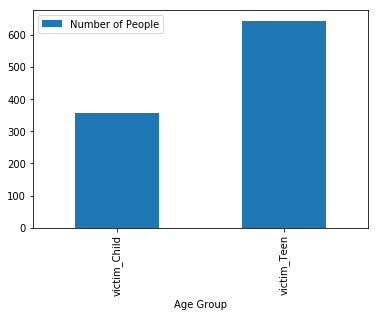

In [114]:
two_agegroup_count = [victim_Child,victim_Teen]
two_agegroup_type = ['victim_Child','victim_Teen']
two_incident = pd.DataFrame({'Number of People': two_agegroup_count, 'Age Group': two_agegroup_type})
two_incident.set_index('Age Group').plot(kind = "bar")

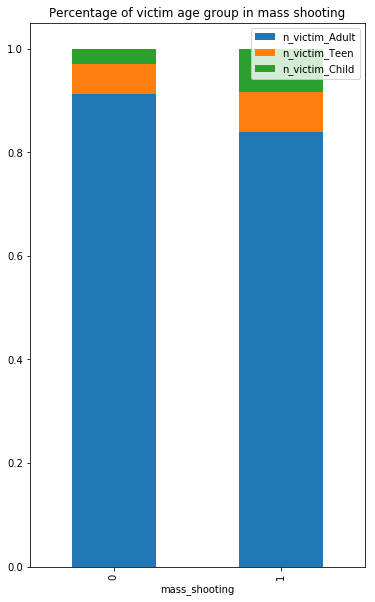

In [339]:
mass_shootin_age = df.loc[:,['n_victim_Child','n_victim_Teen','n_victim_Adult','mass_shooting']].groupby('mass_shooting').sum()
mass_shootin_age['total_victim'] = mass_shootin_age['n_victim_Child']+mass_shootin_age['n_victim_Teen']+mass_shootin_age['n_victim_Adult']
mass_shootin_age['n_victim_Child'] = mass_shootin_age['n_victim_Child']/mass_shootin_age['total_victim']
mass_shootin_age['n_victim_Teen'] = mass_shootin_age['n_victim_Teen']/mass_shootin_age['total_victim']
mass_shootin_age['n_victim_Adult'] = mass_shootin_age['n_victim_Adult']/mass_shootin_age['total_victim']
mass_shootin_age.loc[:,['n_victim_Adult','n_victim_Teen','n_victim_Child']].plot.bar(title = 'Percentage of victim age group in mass shooting',stacked=True,figsize = (6,10))
savefig('victim_mass_shooting_age.pdf')

In [365]:
mass_shootin_age

,n_victim_Child,n_victim_Teen,n_victim_Adult,total_victim
mass_shooting,,,,
0,0.030086,0.057437,0.912478,10603
1,0.083700,0.077093,0.839207,454


In [360]:
df['n_victim_Child'].sum()+df['n_victim_Teen'].sum()+df['n_victim_Adult'].sum()

11057

In [362]:
df['n_victim_Teen'].sum()

644

In [361]:
df['n_victim_Child'].sum()

357

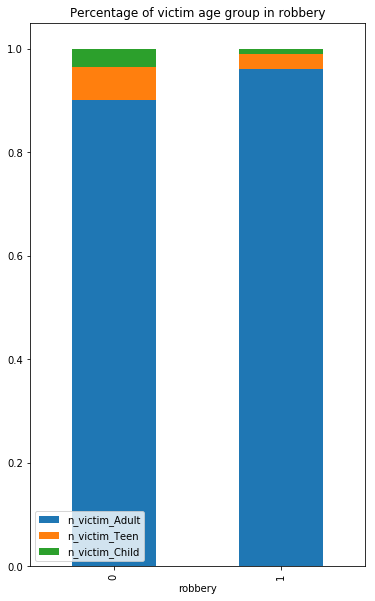

In [335]:
robbery_age = df[['n_victim_Child','n_victim_Teen','n_victim_Adult','robbery']].groupby('robbery').sum()
robbery_age['total_victim'] = robbery_age['n_victim_Child']+robbery_age['n_victim_Teen']+robbery_age['n_victim_Adult']
robbery_age['n_victim_Child'] = robbery_age['n_victim_Child']/robbery_age['total_victim']
robbery_age['n_victim_Teen'] = robbery_age['n_victim_Teen']/robbery_age['total_victim']
robbery_age['n_victim_Adult'] = robbery_age['n_victim_Adult']/robbery_age['total_victim']
robbery_age.loc[:,['n_victim_Adult','n_victim_Teen','n_victim_Child']].plot.bar(title = 'Percentage of victim age group in robbery',stacked=True,figsize = (6,10))
savefig('victim_robbery_age.pdf')

In [363]:
robbery_age

,n_victim_Child,n_victim_Teen,n_victim_Adult,total_victim
robbery,,,,
0,0.035989,0.063033,0.900979,9503
1,0.009653,0.028958,0.961390,1554


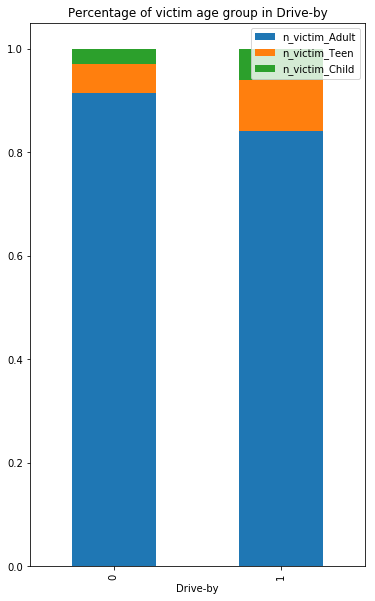

In [338]:
Driveby_age = df[['n_victim_Child','n_victim_Teen','n_victim_Adult','Drive-by']].groupby('Drive-by').sum()
Driveby_age['total_victim'] = Driveby_age['n_victim_Child']+Driveby_age['n_victim_Teen']+Driveby_age['n_victim_Adult']
Driveby_age['n_victim_Child'] = Driveby_age['n_victim_Child']/Driveby_age['total_victim']
Driveby_age['n_victim_Teen'] = Driveby_age['n_victim_Teen']/Driveby_age['total_victim']
Driveby_age['n_victim_Adult'] = Driveby_age['n_victim_Adult']/Driveby_age['total_victim']
Driveby_age.loc[:,['n_victim_Adult','n_victim_Teen','n_victim_Child']].plot.bar(title = 'Percentage of victim age group in Drive-by',stacked=True,figsize = (6,10))
savefig('victim_driveby_age.pdf')

In [364]:
Driveby_age

,n_victim_Child,n_victim_Teen,n_victim_Adult,total_victim
Drive-by,,,,
0,0.030288,0.055237,0.914474,10301
1,0.059524,0.099206,0.841270,756


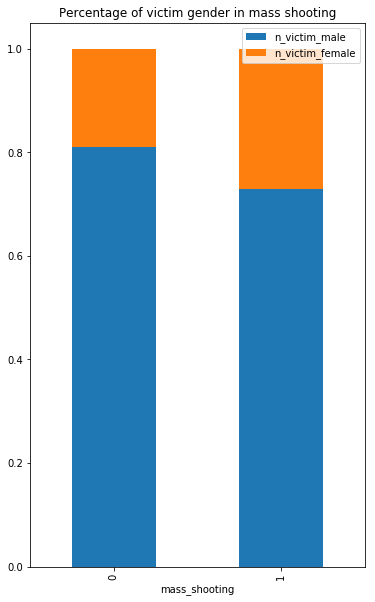

In [336]:
mass_shootin_gender = df[['n_victim_male','n_victim_female','mass_shooting']].groupby('mass_shooting').sum()
mass_shootin_gender['total_victim'] = mass_shootin_gender['n_victim_male']+mass_shootin_gender['n_victim_female']
mass_shootin_gender['n_victim_male'] = mass_shootin_gender['n_victim_male']/mass_shootin_gender['total_victim']
mass_shootin_gender['n_victim_female'] = mass_shootin_gender['n_victim_female']/mass_shootin_gender['total_victim']
mass_shootin_gender.loc[:,['n_victim_male','n_victim_female']].plot.bar(title = 'Percentage of victim gender in mass shooting', stacked=True,figsize = (6,10))
savefig('mass_shooting_gender.png')

In [371]:
df['n_victim_male'].sum()+df['n_victim_female'].sum()

11199

In [372]:
df['n_victim_female'].sum()

2158

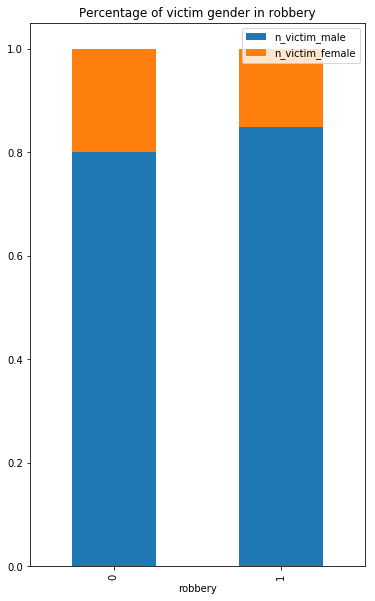

In [343]:
robbery_gender = df[['n_victim_male','n_victim_female','robbery']].groupby('robbery').sum()
robbery_gender['total_victim'] = robbery_gender['n_victim_male']+robbery_gender['n_victim_female']
robbery_gender['n_victim_male'] = robbery_gender['n_victim_male']/robbery_gender['total_victim']
robbery_gender['n_victim_female'] = robbery_gender['n_victim_female']/robbery_gender['total_victim']
robbery_gender.loc[:,['n_victim_male','n_victim_female']].plot.bar(title = 'Percentage of victim gender in robbery', stacked=True,figsize = (6,10))
savefig('robbery_gender.png')

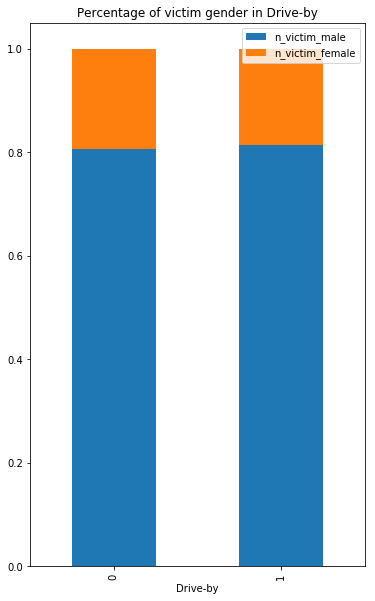

In [344]:
Driveby_gender = df[['n_victim_male','n_victim_female','Drive-by']].groupby('Drive-by').sum()
Driveby_gender['total_victim'] = Driveby_gender['n_victim_male']+Driveby_gender['n_victim_female']
Driveby_gender['n_victim_male'] = Driveby_gender['n_victim_male']/Driveby_gender['total_victim']
Driveby_gender['n_victim_female'] = Driveby_gender['n_victim_female']/Driveby_gender['total_victim']
Driveby_gender.loc[:,['n_victim_male','n_victim_female']].plot.bar(title = 'Percentage of victim gender in Drive-by', stacked=True,figsize = (6,10))
savefig('driveby_gender.png')

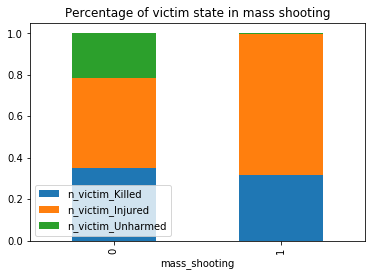

In [193]:
mass_shootin_victim_state = df[['n_victim_Killed','n_victim_Injured','n_victim_Unharmed','mass_shooting']].groupby('mass_shooting').sum()
mass_shootin_victim_state['total_victim'] = mass_shootin_victim_state['n_victim_Killed']+mass_shootin_victim_state['n_victim_Injured']+mass_shootin_victim_state['n_victim_Unharmed']
mass_shootin_victim_state['n_victim_Killed'] = mass_shootin_victim_state['n_victim_Killed']/mass_shootin_victim_state['total_victim']
mass_shootin_victim_state['n_victim_Injured'] = mass_shootin_victim_state['n_victim_Injured']/mass_shootin_victim_state['total_victim']
mass_shootin_victim_state['n_victim_Unharmed'] = mass_shootin_victim_state['n_victim_Unharmed']/mass_shootin_victim_state['total_victim']
mass_shootin_victim_state.loc[:,['n_victim_Killed','n_victim_Injured','n_victim_Unharmed']].plot.bar(title = 'Percentage of victim state in mass shooting',stacked=True)

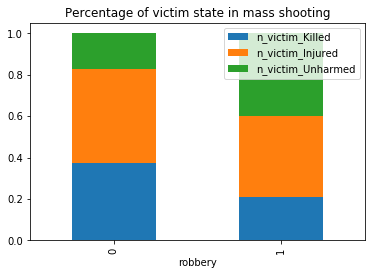

In [198]:
robbery_victim_state = df[['n_victim_Killed','n_victim_Injured','n_victim_Unharmed','robbery']].groupby('robbery').sum()
robbery_victim_state['total_victim'] = robbery_victim_state['n_victim_Killed']+robbery_victim_state['n_victim_Injured']+robbery_victim_state['n_victim_Unharmed']
robbery_victim_state['n_victim_Killed'] = robbery_victim_state['n_victim_Killed']/robbery_victim_state['total_victim']
robbery_victim_state['n_victim_Injured'] = robbery_victim_state['n_victim_Injured']/robbery_victim_state['total_victim']
robbery_victim_state['n_victim_Unharmed'] = robbery_victim_state['n_victim_Unharmed']/robbery_victim_state['total_victim']
robbery_victim_state.loc[:,['n_victim_Killed','n_victim_Injured','n_victim_Unharmed']].plot.bar(title = 'Percentage of victim state in mass shooting',stacked=True)

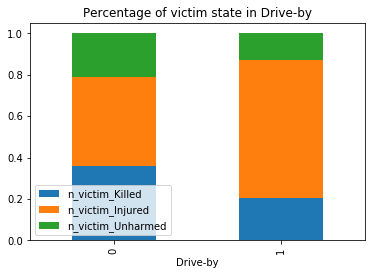

In [197]:
Driveby_victim_state = df[['n_victim_Killed','n_victim_Injured','n_victim_Unharmed','Drive-by']].groupby('Drive-by').sum()
Driveby_victim_state['total_victim'] = Driveby_victim_state['n_victim_Killed']+Driveby_victim_state['n_victim_Injured']+Driveby_victim_state['n_victim_Unharmed']
Driveby_victim_state['n_victim_Killed'] = Driveby_victim_state['n_victim_Killed']/Driveby_victim_state['total_victim']
Driveby_victim_state['n_victim_Injured'] = Driveby_victim_state['n_victim_Injured']/Driveby_victim_state['total_victim']
Driveby_victim_state['n_victim_Unharmed'] = Driveby_victim_state['n_victim_Unharmed']/Driveby_victim_state['total_victim']
Driveby_victim_state.loc[:,['n_victim_Killed','n_victim_Injured','n_victim_Unharmed']].plot.bar(title = 'Percentage of victim state in Drive-by',stacked=True)

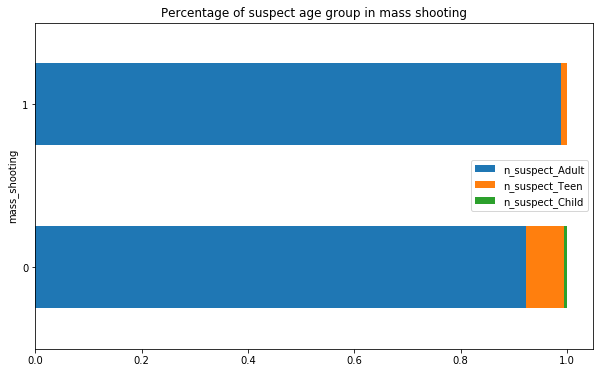

In [342]:
mass_shootin_suspect_age = df.loc[:,['n_suspect_Child','n_suspect_Teen','n_suspect_Adult','mass_shooting']].groupby('mass_shooting').sum()
mass_shootin_suspect_age['total_suspect'] = mass_shootin_suspect_age['n_suspect_Child']+mass_shootin_suspect_age['n_suspect_Teen']+mass_shootin_suspect_age['n_suspect_Adult']
mass_shootin_suspect_age['n_suspect_Child'] = mass_shootin_suspect_age['n_suspect_Child']/mass_shootin_suspect_age['total_suspect']
mass_shootin_suspect_age['n_suspect_Teen'] = mass_shootin_suspect_age['n_suspect_Teen']/mass_shootin_suspect_age['total_suspect']
mass_shootin_suspect_age['n_suspect_Adult'] = mass_shootin_suspect_age['n_suspect_Adult']/mass_shootin_suspect_age['total_suspect']
mass_shootin_suspect_age.loc[:,['n_suspect_Adult','n_suspect_Teen','n_suspect_Child']].plot.barh(title = 'Percentage of suspect age group in mass shooting',stacked=True,figsize = (10,6))
savefig('suspect_mass_shooting_age.pdf')

In [353]:
mass_shootin_suspect_age

,n_suspect_Child,n_suspect_Teen,n_suspect_Adult,total_suspect
mass_shooting,,,,
0,0.005843,0.070284,0.923873,11980
1,0.000000,0.011364,0.988636,88


In [354]:
df['n_suspect_Child'].sum()+df['n_suspect_Teen'].sum()+df['n_suspect_Adult'].sum()

12068

In [356]:
df['n_suspect_Teen'].sum()

843

In [357]:
df['n_suspect_Child'].sum()

70

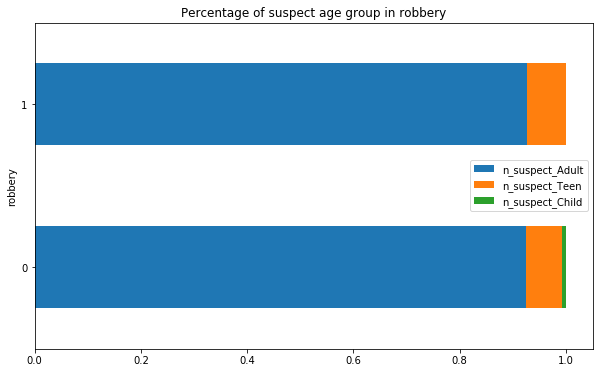

In [340]:
robbery_suspect_age = df.loc[:,['n_suspect_Child','n_suspect_Teen','n_suspect_Adult','robbery']].groupby('robbery').sum()
robbery_suspect_age['total_suspect'] = robbery_suspect_age['n_suspect_Child']+robbery_suspect_age['n_suspect_Teen']+robbery_suspect_age['n_suspect_Adult']
robbery_suspect_age['n_suspect_Child'] = robbery_suspect_age['n_suspect_Child']/robbery_suspect_age['total_suspect']
robbery_suspect_age['n_suspect_Teen'] = robbery_suspect_age['n_suspect_Teen']/robbery_suspect_age['total_suspect']
robbery_suspect_age['n_suspect_Adult'] = robbery_suspect_age['n_suspect_Adult']/robbery_suspect_age['total_suspect']
robbery_suspect_age.loc[:,['n_suspect_Adult','n_suspect_Teen','n_suspect_Child']].plot.barh(title = 'Percentage of suspect age group in robbery',stacked=True,figsize = (10,6))
savefig('suspect_robbery_age.pdf')

In [358]:
robbery_suspect_age

,n_suspect_Child,n_suspect_Teen,n_suspect_Adult,total_suspect
robbery,,,,
0,0.007188,0.068966,0.923846,9599
1,0.000405,0.073309,0.926286,2469


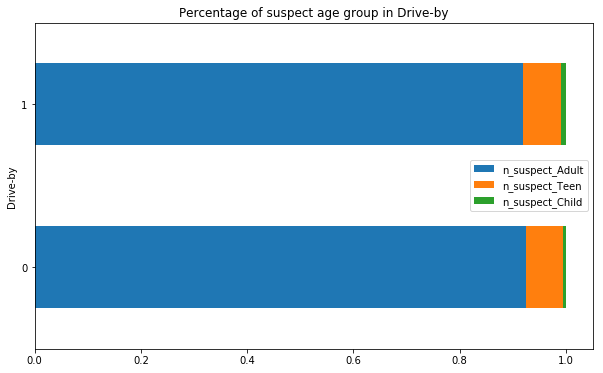

In [341]:
Driveby_suspect_age = df.loc[:,['n_suspect_Child','n_suspect_Teen','n_suspect_Adult','Drive-by']].groupby('Drive-by').sum()
Driveby_suspect_age['total_suspect'] = Driveby_suspect_age['n_suspect_Child']+Driveby_suspect_age['n_suspect_Teen']+Driveby_suspect_age['n_suspect_Adult']
Driveby_suspect_age['n_suspect_Child'] = Driveby_suspect_age['n_suspect_Child']/Driveby_suspect_age['total_suspect']
Driveby_suspect_age['n_suspect_Teen'] = Driveby_suspect_age['n_suspect_Teen']/Driveby_suspect_age['total_suspect']
Driveby_suspect_age['n_suspect_Adult'] = Driveby_suspect_age['n_suspect_Adult']/Driveby_suspect_age['total_suspect']
Driveby_suspect_age.loc[:,['n_suspect_Adult','n_suspect_Teen','n_suspect_Child']].plot.barh(title = 'Percentage of suspect age group in Drive-by',stacked=True,figsize = (10,6))
savefig('suspect_driveby_age.pdf')

In [359]:
Driveby_suspect_age

,n_suspect_Child,n_suspect_Teen,n_suspect_Adult,total_suspect
Drive-by,,,,
0,0.005587,0.069745,0.924668,11456
1,0.009804,0.071895,0.918301,612


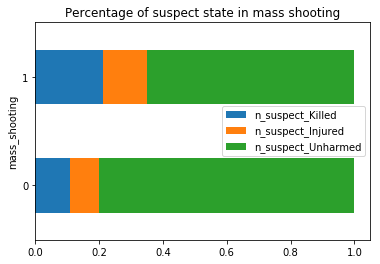

In [214]:
mass_shootin_suspect_state = df[['n_suspect_Killed','n_suspect_Injured','n_suspect_Unharmed','mass_shooting']].groupby('mass_shooting').sum()
mass_shootin_suspect_state['total_suspect'] = mass_shootin_suspect_state['n_suspect_Killed']+mass_shootin_suspect_state['n_suspect_Injured']+mass_shootin_suspect_state['n_suspect_Unharmed']#+mass_shootin_suspect_state['n_suspect_Arrested']
mass_shootin_suspect_state['n_suspect_Killed'] = mass_shootin_suspect_state['n_suspect_Killed']/mass_shootin_suspect_state['total_suspect']
mass_shootin_suspect_state['n_suspect_Injured'] = mass_shootin_suspect_state['n_suspect_Injured']/mass_shootin_suspect_state['total_suspect']
mass_shootin_suspect_state['n_suspect_Unharmed'] = mass_shootin_suspect_state['n_suspect_Unharmed']/mass_shootin_suspect_state['total_suspect']
#mass_shootin_suspect_state['n_suspect_Arrested'] = mass_shootin_suspect_state['n_suspect_Arrested']/mass_shootin_suspect_state['total_suspect']
mass_shootin_suspect_state.loc[:,['n_suspect_Killed','n_suspect_Injured','n_suspect_Unharmed']].plot.barh(title = 'Percentage of suspect state in mass shooting',stacked=True)

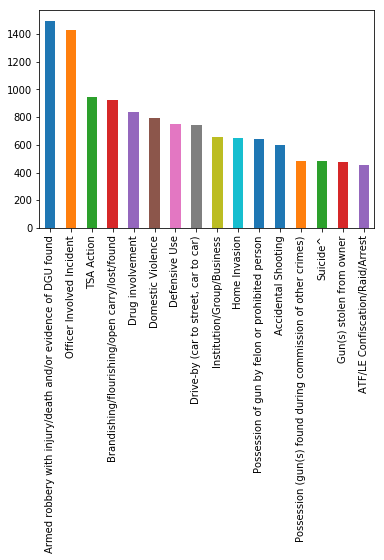

In [331]:
city_charac = city_charac[['city_or_county','incident_characteristics']]
city_charac['incident_characteristics'].value_counts().iloc[4:20].plot(kind = "bar")
savefig('top15_charac.png')

In [350]:
city_charac['incident_characteristics'].value_counts()

Shot - Wounded/Injured                                                                        4719
Shot - Dead (murder, accidental, suicide)                                                     4296
Non-Shooting Incident                                                                         2088
Shots Fired - No Injuries                                                                     1648
Armed robbery with injury/death and/or evidence of DGU found                                  1496
Officer Involved Incident                                                                     1432
TSA Action                                                                                     944
Brandishing/flourishing/open carry/lost/found                                                  924
Drug involvement                                                                               841
Domestic Violence                                                                              792
Defensive 

In [247]:
city_charac_cross = pd.crosstab(city_charac.city_or_county, city_charac.incident_characteristics, margins=True)

In [248]:
city_charac_cross_total = city_charac_cross.append(city_charac_pivoted.sum(numeric_only=True), ignore_index=True)

In [259]:
charac_list = city_charac_cross_total.T.sort_values(by = 867, ascending = False).iloc[np.r_[5:20], :].index.tolist()

In [276]:
city_list = pop[['PLACE','7/1/2017']].sort_values(by = '7/1/2017', ascending = False)[:15]['PLACE'].tolist()

In [278]:
city_charac_cross_select = city_charac_cross.T[city_charac_cross.T.index.isin(charac_list)].T
city_charac_cross_select = city_charac_cross_select[city_charac_cross_select.index.isin(city_list)].T
city_charac_cross_select

city_or_county,Amarillo,Arlington,Austin,Corpus Christi,Dallas,El Paso,Fort Worth,Garland,Grand Prairie,Houston,Irving,Laredo,Lubbock,Plano,San Antonio
incident_characteristics,,,,,,,,,,,,,,,
Accidental Shooting,4,7,11,19,25,6,17,3,0,72,1,4,10,1,55
Armed robbery with injury/death and/or evidence of DGU found,34,19,43,68,132,18,53,6,0,394,5,14,42,5,160
Brandishing/flourishing/open carry/lost/found,26,13,45,57,45,12,28,1,3,111,3,20,28,2,63
Defensive Use,24,15,17,18,60,4,23,5,1,181,0,2,13,2,104
Domestic Violence,17,12,20,21,28,15,39,1,8,89,6,8,20,1,82
"Drive-by (car to street, car to car)",18,9,11,41,59,10,21,0,1,183,2,12,13,0,182
Drug involvement,34,17,27,66,39,11,17,0,0,51,1,7,19,1,101
Gun(s) stolen from owner,13,0,12,43,4,0,2,2,2,13,0,5,20,1,22
Home Invasion,17,9,20,30,44,2,18,2,0,128,1,2,17,1,83


In [279]:
city_common_charac = DataFrame({'Most common incident':city_charac_cross_select.idxmax(), 'Num incident':city_charac_cross_select.max()})

In [282]:
city_common_charac.sort_values(by = 'Num incident', ascending = False)

,Most common incident,Num incident
city_or_county,,
Houston,Armed robbery with injury/death and/or evidenc...,394
Dallas,TSA Action,266
San Antonio,"Drive-by (car to street, car to car)",182
Austin,TSA Action,108
Corpus Christi,Armed robbery with injury/death and/or evidenc...,68
Fort Worth,Armed robbery with injury/death and/or evidenc...,53
Lubbock,Armed robbery with injury/death and/or evidenc...,42
Irving,TSA Action,40
Amarillo,Armed robbery with injury/death and/or evidenc...,34


In [288]:
def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NA")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NA")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NA")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))

suspect_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = row['participant_age_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1


In [333]:
init_notebook_mode(connected=True)
trace1 = go.Bar(x=list(suspect_age_groups.keys()), y=list(suspect_age_groups.values()), opacity=0.75, name="month", marker=dict(color='rgba(213, 146, 229)'))
layout = dict(height=400, title='Suspects Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [352]:
df['n_suspect'].sum()

13272

In [310]:
victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
trace1 = go.Bar(x=list(victim_age_groups.keys()), y=list(victim_age_groups.values()), opacity=0.75, name="month", marker=dict(color='brown'))
layout = dict(height=400, title='Victims Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

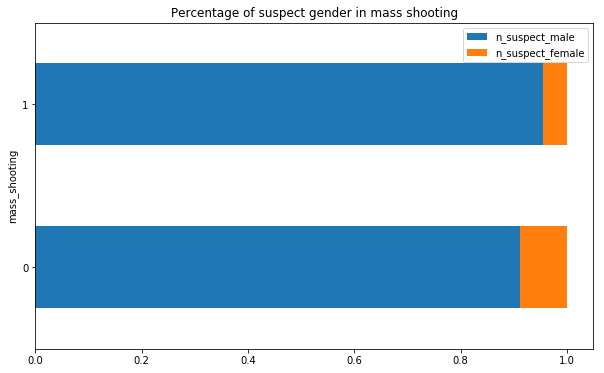

In [393]:
mass_shootin_suspect_gender = df[['n_suspect_male','n_suspect_female','mass_shooting']].groupby('mass_shooting').sum()
mass_shootin_suspect_gender['total_suspect'] = mass_shootin_suspect_gender['n_suspect_male']+mass_shootin_suspect_gender['n_suspect_female']
mass_shootin_suspect_gender['n_suspect_male'] = mass_shootin_suspect_gender['n_suspect_male']/mass_shootin_suspect_gender['total_suspect']
mass_shootin_suspect_gender['n_suspect_female'] = mass_shootin_suspect_gender['n_suspect_female']/mass_shootin_suspect_gender['total_suspect']
#mass_shootin_suspect_gender['n_suspect_Adult'] = mass_shootin_suspect_gender['n_suspect_Adult']/mass_shootin_suspect_gender['total_suspect']
mass_shootin_suspect_gender.loc[:,['n_suspect_male','n_suspect_female']].plot.barh(title = 'Percentage of suspect gender in mass shooting',stacked=True,figsize = (10,6))
savefig('suspect_mass_shooting_gender.pdf')

In [381]:
mass_shootin_suspect_gender

,n_suspect_male,n_suspect_female,total_suspect
mass_shooting,,,
0,0.994823,0.005177,210724.0
1,0.997349,0.002651,1509.0


In [389]:
df['n_suspect_male'].sum()+df['n_suspect_female'].sum()

12404

In [390]:
df['n_suspect_female'].sum()

1095

In [392]:
df['n_suspect_male'].sum()

11309

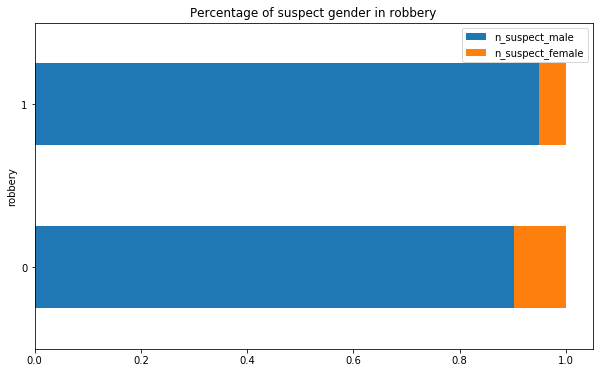

In [394]:
robbery_suspect_gender = df[['n_suspect_male','n_suspect_female','robbery']].groupby('robbery').sum()
robbery_suspect_gender['total_suspect'] = robbery_suspect_gender['n_suspect_male']+robbery_suspect_gender['n_suspect_female']
robbery_suspect_gender['n_suspect_male'] = robbery_suspect_gender['n_suspect_male']/robbery_suspect_gender['total_suspect']
robbery_suspect_gender['n_suspect_female'] = robbery_suspect_gender['n_suspect_female']/robbery_suspect_gender['total_suspect']
#robbery_suspect_gender['n_suspect_Adult'] = robbery_suspect_gender['n_suspect_Adult']/robbery_suspect_gender['total_suspect']
robbery_suspect_gender.loc[:,['n_suspect_male','n_suspect_female']].plot.barh(title = 'Percentage of suspect gender in robbery',stacked=True,figsize = (10,6))
savefig('suspect_robbery_gender.pdf')

In [377]:
robbery_suspect_gender

,n_suspect_male,n_suspect_female,total_suspect
robbery,,,
0,0.994913,0.005087,189911.0
1,0.994221,0.005779,22322.0


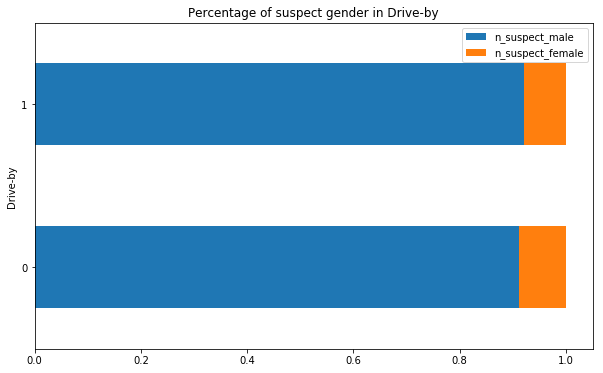

In [395]:
driveby_suspect_gender = df[['n_suspect_male','n_suspect_female','Drive-by']].groupby('Drive-by').sum()
driveby_suspect_gender['total_suspect'] = driveby_suspect_gender['n_suspect_male']+driveby_suspect_gender['n_suspect_female']
driveby_suspect_gender['n_suspect_male'] = driveby_suspect_gender['n_suspect_male']/driveby_suspect_gender['total_suspect']
driveby_suspect_gender['n_suspect_female'] = driveby_suspect_gender['n_suspect_female']/driveby_suspect_gender['total_suspect']
#driveby_suspect_gender['n_suspect_Adult'] = driveby_suspect_gender['n_suspect_Adult']/driveby_suspect_gender['total_suspect']
driveby_suspect_gender.loc[:,['n_suspect_male','n_suspect_female']].plot.barh(title = 'Percentage of suspect gender in Drive-by',stacked=True,figsize = (10,6))
savefig('suspect_driveby_gender.pdf')

In [379]:
driveby_suspect_gender

,n_suspect_male,n_suspect_female,total_suspect
Drive-by,,,
0,0.994766,0.005234,199647.0
1,0.996027,0.003973,12586.0
